In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

# Part 1: Creating DataSets

In [2]:
#noise_std = 2 + np.random.rand() * 2
#m, b = 2 + np.random.randn(2) * 4
#(2.2383863917908116, 3.621303629376391, 5.56192333186776)
noise_std, m, b = 2.238, 3.621, 5.562

In [3]:
X1, X2, X3, X4 = map(lambda x: np.random.rand(x) * 13 , [5, 25, 100, 1000])

y1, y2, y3, y4 = map(lambda x: m * x + b + np.random.normal(scale = noise_std, size = x.shape), [X1, X2, X3, X4])


In [4]:
X = np.array([X1, X2, X3, X4])
Y = np.array([y1, y2, y3, y4])

<ipython-input-4-19115cd8ec81>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  X = np.array([X1, X2, X3, X4])
<ipython-input-4-19115cd8ec81>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Y = np.array([y1, y2, y3, y4])


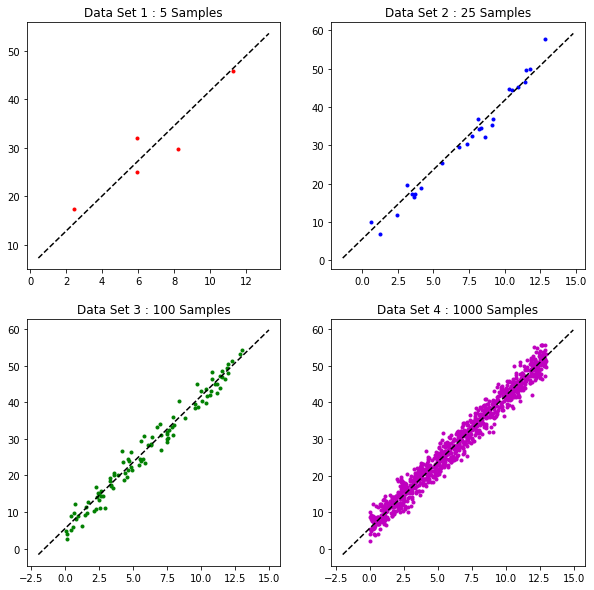

In [5]:
colors = ["r", "b", "g", "m"]
i = 1

plt.figure(figsize=(10,10))

for x, y, color in zip(X,Y,colors):
    
    x_line = np.array([x.min()-2, x.max()+2])
    y_line = m * x_line + b 
    
    plt.subplot(2,2, i)
    plt.plot(x, y, "{}." .format(color))
    plt.title("Data Set {} : {} Samples" .format(i,x.shape[0]))
    plt.plot(x_line, y_line, "k--")
    i += 1


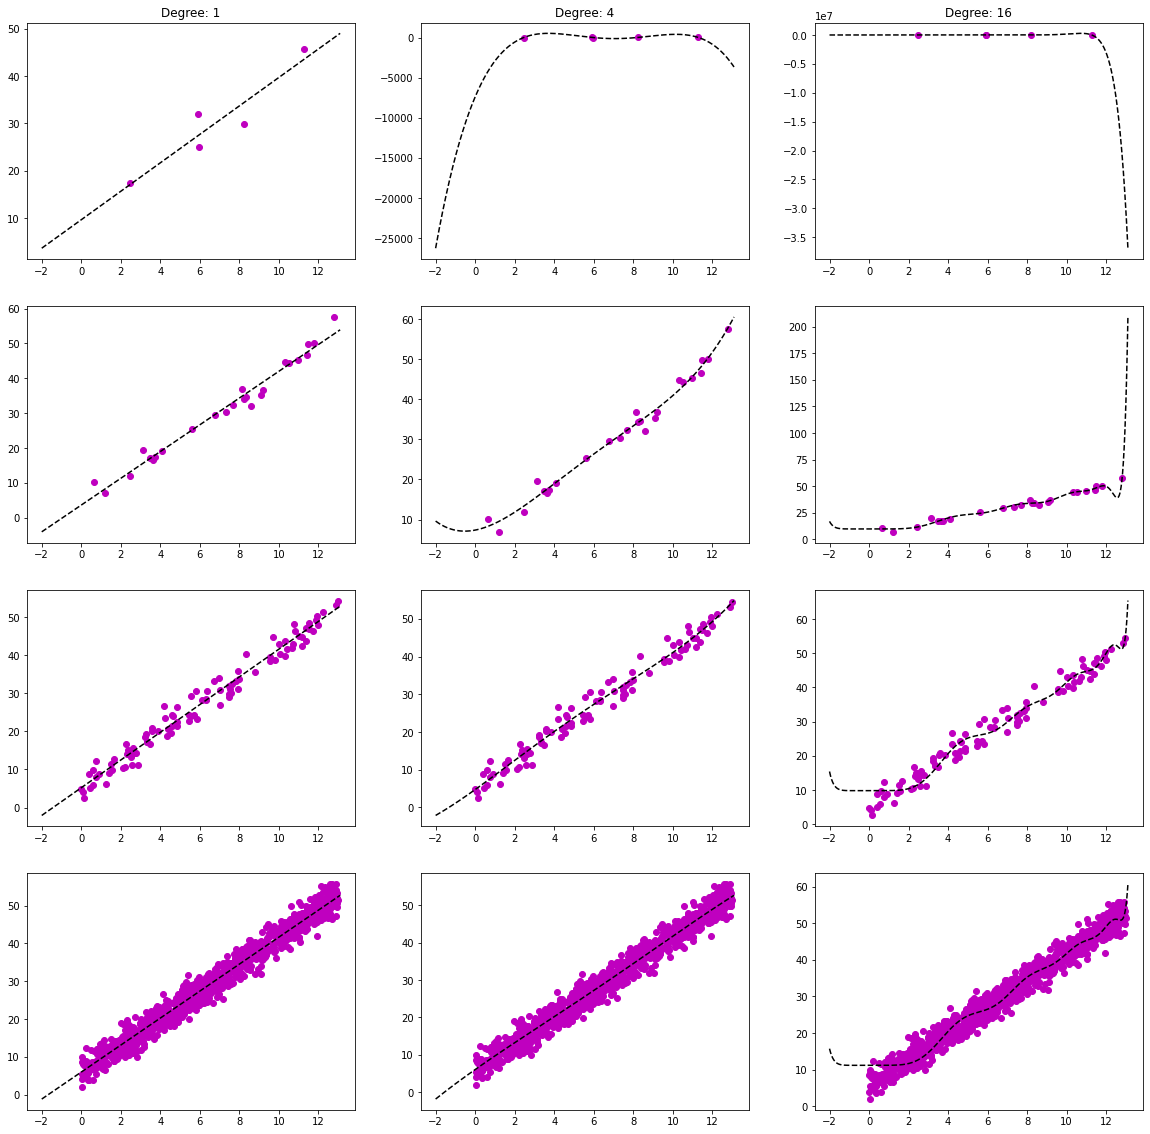

In [6]:
plt.figure(figsize=(20,20))
i,scores = 1,[]
coefficients = []

for x,y in zip(X,Y):
    
    x,y = x.reshape(-1,1), y.reshape(-1,1)

    for degree in [1,4,16]:
        
        # train model
        lr_model = LinearRegression()
        lr_model.fit(PolynomialFeatures(degree=degree).fit_transform(x) if degree > 1 else x ,y)
        scores.append(lr_model.score(PolynomialFeatures(degree=degree).fit_transform(x) if degree > 1 else x ,y) )
        
        # plot
        x_line = np.arange(-2,13.1,0.001).reshape(-1,1)
        plt.subplot(4,3,i)
        plt.plot(x, y, "mo")
        plt.plot(x_line, lr_model.predict(PolynomialFeatures(degree=degree).fit_transform(x_line) if degree > 1 else x_line ), "k--")
        if i < 4:
            plt.title("Degree: {}" .format(degree))
        i += 1


When the data size is very small (=5), increasing the polynomial powers (and subseqently the model complexity), results in higher accuracy over the training data. In this case, the model is enabled to memorize the data set and will find a curve that goes through all the points. ```Although the training score becomes realy high, the model will have lower performance on unseen or test data set.``` In other words, the model is overfitted and is not suitable for real applications.

With the increase in training data size, it becomes harder for the model to memorize and fit all the training data. However, if the polynomial degree is increased, the model is enabled to find a matching curve. In size=25 and degree=16 case for example, the model has highly succeeded in memorizing the training data set. But in subsequent figures, it can be seen that despite using more complex curves, the model is approximating (and not memorizing) the pattern. 
```In fact, using larger training training set is a good way to prevent overfitting.```

{For a given polynomial degree, rising the training data set size}  and
{for a given training data set size, lowering the polynomial degree}  
result in smoother curves.

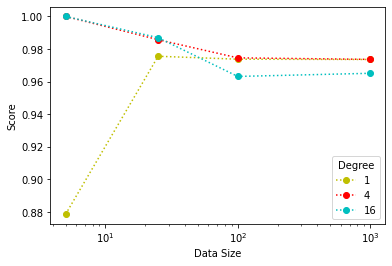

In [7]:
for i,color in enumerate(["y:o","r:o","c:o"]):
    plt.xscale("log")
    plt.plot([5, 25, 100, 1000], scores[i::3], "{}" .format(color))
    plt.xlabel("Data Size")
    plt.ylabel("Score")
    plt.legend([1,4,16],title="Degree")

In this figure, when the polynomial degree is high (16), the training score is 100%. But the rise in training data set size has led to lower training score. Though, it does not necessarily convey a lower test score.

# Questions

### 1. Is it good to use Non-Linear Regression for linear data?  Under what circumstances it won't work?

It causes computation overhead and model complexity, but if a higher validation accuracy than the linear model is achieved (without overfitting), and it is worth it, yes why not.
But if the validation accuracy is lowered and overfitting has occured, it is not a good idea. If we don't have enough training data, the overfitting chance is high.

### 2. How can we find the suitable polynomial degree if we don't have any assumptions about the data? (There are too many features)

This is a hyper parameter and we can use tuning techniques like grid search. We can also plot the output versus some features to have a better sense about the probable degree of each feature. 

In [8]:
x_train = np.random.rand(2000) * 10
y_train = -6.77 + 3.2*x_train + -4.3* x_train**2 + 2.2 * x_train**3 + -3.3 * x_train**6 +np.random.normal(scale = 2, size = x_train.shape)    
x_train,y_train = x_train.reshape(-1,1),y_train.reshape(-1,1)

x_test = np.random.rand(500) * 12 
y_test = -6.77 + 3.2*x_test + -4.3* x_test**2 + 2.2 * x_test**3 + -3.3 * x_test**6 + np.random.normal(scale = 3, size = x_test.shape)    
x_test,y_test = x_test.reshape(-1,1),y_test.reshape(-1,1)

best_score,best_degree = 0,0

for degree in range(1,20):

    # train model
    lr_model = LinearRegression()
    lr_model.fit(PolynomialFeatures(degree=degree).fit_transform(x_train) if degree > 1 else x_train ,y_train)
    score = lr_model.score(PolynomialFeatures(degree=degree).fit_transform(x_test) if degree > 1 else x_test ,y_test)
    if best_score < score:
        best_score = score 
        best_degree = degree 
        best_coeffs = lr_model.coef_
        
print("best_score:", best_score,"best_degree",best_degree) 
print("best_coeffs:",*best_coeffs)

best_score: 0.9999999999980488 best_degree 7
best_coeffs: [ 0.00000000e+00  4.10076078e+00 -5.53334038e+00  2.90126014e+00
 -1.89973145e-01  2.61439109e-02 -3.30177250e+00  4.71153774e-05]


### 3. Is a highly accurate model on training data set always desirable?

Not necessarily. The model might have had "memorized" the data set in order to have a better accuracy, thus showing poor performance on unseen or test data set. In other words, it may be overfitted. To test if it is the case, we should first check the validation accuracy, as it is of higher importance. 
 
Validation Acc. high ----> OK
Validation Acc. low , Training Acc. high ----> NOT OK, overfitted
